# DSCI 512 Lecture 3

Outline:

- Recursion intro: random tree graphics (5 min)
- Recursion intro: the details (35 min)
- Break (5 min)
- Binary search, revisited (5 min)
- Group activity (10 min)
- Multiple recursive calls (20 min)
- ~Group activity (10 min)~

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt

## Recursion intro: random tree graphics (10 min)

Below: credit for the idea goes to [Dan Garcia](https://people.eecs.berkeley.edu/~ddgarcia/) and specifically his [talk at UBC](https://www.youtube.com/watch?v=3QEGzSXB3mc) about his course called [The Beauty and Joy of Computing](https://bjc.berkeley.edu/).

In [21]:
def move_pen(x, y, angle, length):
    """
    Moves a point from initial location of x and y according to
    angle and length specified.

    Parameters
    ----------
    x : float
        initial location of pen on the x axis
    y : float
        initial location of pen on the y axis
    angle : float
        direction from initial location (0 means up)
    length: distance from the initial location desired to move

    Returns
    -------
    new_x : float
        new location on the x axis 
    new_y : float
        new location on the y axis 

    Examples
    --------
    >>> move_pen(0, 0, 90,2)
    (2.0, 0)
    >>> move_pen(0, 0, 180,2)
    (0, -2.0)

    """
    new_x = x + length * np.sin(angle * np.pi / 180.0)
    new_y = y + length * np.cos(angle * np.pi / 180.0)
    return new_x, new_y

def branch(x, y, angle=0, length=1, marker="."):
    """
    Plot a shape at the end of a tree branch.

    Parameters
    ----------
    x : float
        initial location on the x axis
    y : float
        initial location on the y axis
    angle : float, optional (default = 0)
        not used, needed to conform to the same interface as vee
    length: float, optional (default = 1)
        not used, needed to conform to the same interface as vee
    marker : str, optional (default = ".")
        the shape at the end of the branch
    """
    plt.plot(x, y, marker=marker, markersize="15",
             markerfacecolor="None", markeredgecolor="k")

def square(*args):
    return branch(*args, marker="s")

def hexagon(*args):
    return branch(*args, marker="h")

def star(*args, length=1):
    return branch(*args, marker="*")

def vee(x=0, y=0, angle=0, length=1):
    """
    Plots a tree with random shaped nodes given
    a trunk location, branch angle and branch length.

    Parameters
    ----------
    x : float, optional (default = 0)
        location of pen on the x axis
    y : float, optional (default = 5)
        location of pen on the y axis
    angle : float, optional (default = 0)
        direction from location desired to move in degrees 
    length: float,  (default = 1)
        distance from the location desired to move
    """
#     plt.figure(figsize=(4,3))
    
    # possible shapes
    shapes = [square, hexagon, star, vee, vee]

    # branch left
    shape = np.random.choice(shapes)
    new_angle = angle - 20/np.pi
    new_x, new_y = move_pen(x, y, new_angle, length)
    plt.plot([x, new_x], [y, new_y], 'k')
    shape(new_x, new_y, new_angle, length)

    # branch right
    shape = np.random.choice(shapes)
    new_angle = angle + 20/np.pi
    new_x, new_y = move_pen(x, y, new_angle, length)
    plt.plot([x, new_x], [y, new_y], 'k')
    shape(new_x, new_y, new_angle, length)

    plt.xticks(())
    plt.yticks(())
    plt.xlim((-2, 2))
    plt.ylim((0, 10))
#     plt.draw()
#     plt.pause(0.05)

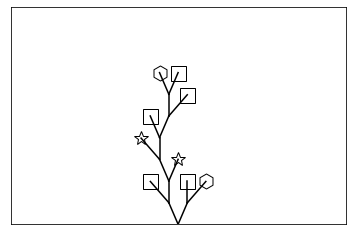

In [36]:
vee()

## Recursion intro: the details (20 min)

- We are going to take a very step-by-step approach to recursion.
- It might be boring in the middle, but it's going somewhere.

#### Step 1: functions with outputs but no inputs

Consider this function:

In [37]:
def h():
    return 0

We can call it:

In [38]:
h()

0

Now let's add a function `g` that calls `h`:

In [40]:
def g():
    return h() + 1

In [42]:
g()

1

- What's happening here? `g` is calling `h`, which returns $0$.
- It then adds this result, $0$, to $1$ and gets $1$.
- So it returns $1$.

Now let's add a function `f` that calls `g`:

In [43]:
def f():
    return g() + 1

In [44]:
f()

2

- What's happening here? `f` is calling `g`.
- We already know `g` returns $1$, so no need to go through that again.
- So `f` adds $1+1$, and returns $2$.

What's the idea here? That functions can call each other, and we can methodically "unpack" what happens when they call each other. And furthermore, if we already know what `g` does, we can forget about the fact that it calls `h`.

#### Step 2: functions with inputs but no outputs

Now let's make it more interesting by letting the functions take arguments. Consider these functions:

In [45]:
def h(n):
    print("You called h with argument", n)
    print("Ending h with argument", n)

In [46]:
h(3)

You called h with argument 3
Ending h with argument 3


In [47]:
h(2)

You called h with argument 2
Ending h with argument 2


In [48]:
def g(n):
    print("You called g with argument", n)
    h(n-1)  
    print("Ending g with argument", n)

In [49]:
g(1)

You called g with argument 1
You called h with argument 0
Ending h with argument 0
Ending g with argument 1


In [50]:
g(2)

You called g with argument 2
You called h with argument 1
Ending h with argument 1
Ending g with argument 2


In [51]:
g(3)

You called g with argument 3
You called h with argument 2
Ending h with argument 2
Ending g with argument 3


Ok, now let's add another function, `f`.

In [58]:
def f(n):
    print("You called f with argument", n)
    g(n-1)  
    print("Ending f with argument", n)

In [60]:
f(5)

You called f with argument 5
You called g with argument 4
You called h with argument 3
Ending h with argument 3
Ending g with argument 4
Ending f with argument 5


In [61]:
f(10)

You called f with argument 10
You called g with argument 9
You called h with argument 8
Ending h with argument 8
Ending g with argument 9
Ending f with argument 10


FYI (optional): what we're seeing above is a depiction of the functions' [call stack](https://en.wikipedia.org/wiki/Call_stack). 

#### Step 3: functions with inputs _and_ outputs

Above, each function is passing data _into_ the next function.

Below, we try passing data _out_ of each function as well.

In [62]:
def h(n):
    print("Starting h with argument", n)
    value = 0
    print("Ending h with value", value)
    return value

In [63]:
h(5)

Starting h with argument 5
Ending h with value 0


0

`h` is a weird function that ignores its input and just returns 0.

Below, `g` calls `h` will a smaller value of `n`, and then adds 1 to the result.

In [64]:
def g(n):
    print("Starting g with argument", n)
    value = h(n-1) + 1
    print("Ending g with value", value)
    return value

In [65]:
g(10)

Starting g with argument 10
Starting h with argument 9
Ending h with value 0
Ending g with value 1


1

Let's look at the _order_ of the print statements:

1. We start `g`
2. We start `h`
3. We end `h`
4. We end `g`

This is critical to understanding what happens next.

In [66]:
def f(n):
    print("Starting f with argument", n)
    value = g(n-1) + 1
    print("Ending f with value", value)
    return value

In [71]:
result = f(11)
result

Starting f with argument 11
Starting g with argument 10
Starting h with argument 9
Ending h with value 0
Ending g with value 1
Ending f with value 2


2

Let's remove some of the print statements to make things more compact:

In [72]:
def f(n):
    print("Starting f with argument", n)
    return g(n-1) + 1


def g(n):
    print("Starting g with argument", n)
    return h(n-1) + 1


def h(n):
    print("Starting h with argument", n)
    return 0

In [73]:
f(11)

Starting f with argument 11
Starting g with argument 10
Starting h with argument 9


2

So far, this isn't interesting because we're not using `n` for anything. We get the same result, $2$, for any value of `n`:

In [74]:
f(1000)

Starting f with argument 1000
Starting g with argument 999
Starting h with argument 998


2

Now look at this code (we're getting close to the punch line):

In [76]:
def f(n):
    print("Starting f with argument", n)
    if n == 0:
        return 0
    else:
        return g(n-1) + 1


def g(n):
    print("Starting g with argument", n)
    if n == 0:
        return 0
    else:
        return h(n-1) + 1


def h(n):
    print("Starting h with argument", n)
    if n == 0:
        return 0
    else:
        return i(n-1) + 1

# ...
# ...

This code actually uses `n`. Here's what it `f` outputs

|  `n`   |   `f(n)` |
|--------|--------|
| 0      |    0   |
| 1      |    1   |
| 2      |    2   |
| 3+     | error  |


In [77]:
f(0)

Starting f with argument 0


0

In [78]:
f(1)

Starting f with argument 1
Starting g with argument 0


1

In [79]:
f(2)

Starting f with argument 2
Starting g with argument 1
Starting h with argument 0


2

In [80]:
f(3)

Starting f with argument 3
Starting g with argument 2
Starting h with argument 1


NameError: name 'i' is not defined

And now the key insight: all of the functions above are _exactly the same_. They check if `n` is zero. If so, they return zero. Otherwise, they call a function _identical to themselves_ with argument `n-1`, add `1` to the result, and return it.

So why write

In [81]:
def f(n):
    if n == 0:
        return 0
    else:
        return g(n-1) + 1

# def g(n):
#     ...
#
# def h(n):
#     ...

a million times when you can just write

In [82]:
def f(n):
    if n == 0:
        return 0
    else:
        return f(n-1) + 1

BAM! Recursion. 

- It is just incidental that all the functions have the same name, `f`. 
- It may be helpful for you to think of them as separate. 
- They do live in separate universes, with separate variables, like `n` and all other variables. 
- The fact that they are all named `f` is just a matter of convenience, to avoid writing an infinite amount of code.

In [84]:
f(-1)

100

Let's put our print string back in...

In [85]:
def f(n):
    print("Starting f with argument", n)
    if n == 0:
        print("Ending f with n =", n, "and returning 0 (base case)")
        return 0
    else:
        value = f(n-1) + 1
        print("Ending f with n =", n, "and returning", value)
        return value

In [86]:
f(2)

Starting f with argument 2
Starting f with argument 1
Starting f with argument 0
Ending f with n = 0 and returning 0 (base case)
Ending f with n = 1 and returning 1
Ending f with n = 2 and returning 2


2

- Does this look familiar? It's the same "call stack" we saw before with our `f`, `g`, and `h`. Except now all the functions are named `f`. 
- The `if n == 0` part of the code is called the _base case_. This is like the function `h` earlier. It is the function that does _not_ call itself, and it's what causes the recursion to terminate.
- The call to itself, in this case `f(n-1)` is the recursive step.

In [87]:
f(5)

Starting f with argument 5
Starting f with argument 4
Starting f with argument 3
Starting f with argument 2
Starting f with argument 1
Starting f with argument 0
Ending f with n = 0 and returning 0 (base case)
Ending f with n = 1 and returning 1
Ending f with n = 2 and returning 2
Ending f with n = 3 and returning 3
Ending f with n = 4 and returning 4
Ending f with n = 5 and returning 5


5

## Break (5 min)

## Binary search, revisited (5 min)

- Let's return to binary search from [Lecture 2](https://github.ubc.ca/MDS-2019-20/DSCI_512_alg-data-struct_students/blob/master/lectures/lecture2.ipynb).
- The code is rather messy.
- Here is a case where recursion works beautifully.

In [88]:
def binary_search(data, key):
    """
    Searches the key in data using binary search. 
    Returns True if found and False otherwise. 

    Parameters
    ----------
    data : list
        the elements to search within
    key : int
        the key to search for

    Returns
    -------
    bool
        is the key contained in the data?

    Examples
    --------
    >>> binary_search([1, 7, 35, 45, 67], 3)
    False
    >>> binary_search([1, 7, 35, 45, 67], 7)
    True
    """
    if len(data) == 1:
        return data[0] == key

    mid = len(data)//2
    if key < data[mid]:
        return binary_search(data[:mid], key)
    else:
        return binary_search(data[mid:], key)

In [89]:
data = [-12, 4, 7, 9, 45, 987, 987, 1000, 2000]

# Test cases for binary search
# key is the first element in the list
assert binary_search(data, -12)

# key is the last element in the list
assert binary_search(data, 2000)

# key is the middle element in the list
assert binary_search(data, 45)

# key occurs multiple times in the list
assert binary_search(data, 987)

# key is larger than the largest element in the list
assert not binary_search(data, 3000)

# key is smaller than the smallest element in the list
assert not binary_search(data, -18)

- So elegant!
- And also maps more clearly to our verbal description of the algorithm (think of the phone book).

## Group activity (10 min)

Consider the code below:

In [91]:
def f(n):
    if n == 0:
        return ""
    elif n == 3:
        return "b" + f(n-1) + "c"
    else:
        return "a" + f(n-1)

**Without running the code**, fill in the table for what `f` returns:

|  `n`   |   `f(n)` |
|--------|--------|
| 0      |   ""     |
| 1      |   "a"    |
| 2      |   "aa"   |
| 3      |   "baac"   |
| 4      |   "abaac"     |
| 5      |   "aabaac"     |
| -1     |   _infinite loop_     |

In [92]:
for n in range(6):
    print(f'f({n}) = {f(n)}')

f(0) = 
f(1) = a
f(2) = aa
f(3) = baac
f(4) = abaac
f(5) = aabaac


## Multiple recursive calls (20 min)

Consider the function below.

In [93]:
def f(n):
    if n == 1 or n == 2:
        return 1
    else: 
        return f(n-1) + f(n-2)

What is returned by `f(3)`?
What is returned by `f(4)`?


In [94]:
f(4)

3

In [96]:
def f(n):
    print("Starting f with argument", n)
    if n == 1 or n == 2:
        return 1
    else:
        return f(n-1) + f(n-2)

In [97]:
f(4)

Starting f with argument 4
Starting f with argument 3
Starting f with argument 2
Starting f with argument 1
Starting f with argument 2


3

Note this is equivalent to:

In [ ]:
def f(n):
    print("Starting f with argument", n)
    if n == 1 or n == 2:
        return 1
    val1 = f(n-1)
    val2 = f(n-2)
    return val1 + val2

f(4)

In other words, there's no significance to the two recursive calls being on the same line of code.

Let's draw out the execution tree.

- First, `f(4)` is called.
- The first thing it does is call `f(n-1) = f(3)`

![](recursion-example/1s.png)

- The first thing `f(3)` does is call `f(n-1)=f(2)`.

![](recursion-example/2s.png)

- `f(2)` triggers the base case and immediately returns $1$.

![](recursion-example/3s.png)

- The return value $1$ is passed back up to `f(3)`. 
- `f(3)` is trying to call `f(n-1) + f(n-2)`, and the first of those has just returned with value $1$.
- So it now proceeds to call the second one, namely `f(n-2)` or `f(1)`.

![](recursion-example/4s.png)

- `f(1)` triggers the base case and immediately returns $1$.
- The return value $1$ is passed back up to `f(3)`. 

![](recursion-example/5s.png)

- `f(3)` is now done, because it has computed $f(n-1) + f(n-2) = 1 + 1 = 2$

![](recursion-example/6s.png)

- It passes this value, $2$ up to its caller, namely `f(4)`.
- `f(4)` is trying to call `f(n-1) + f(n-2)`, and the first of those has just returned with value $2$.
- So it now proceeds to call the second one, namely `f(n-2)` or `f(2)`.

![](recursion-example/7s.png)

- `f(2)` triggers the base case and immediately returns $1$.

![](recursion-example/8s.png)

- `f(4)` is now done, because it has computed $f(n-1) + f(n-2) = 2 + 1 = 3$

![](recursion-example/9s.png)

- The function above implements the [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_number): $F_n=F_{n-1}+F_{n-2}$.
- In this case we need 2 base cases to get things started, because $F_n$ depends on the previous 2 steps.
- Recursive functions don't need to be sequences, as we'll see.
- The time complexity here is something like $O(2^n)$ 
  - (Slightly less than $2^n$ steps but close enough.)
  - It is generally true, rougly speaking, that if a recursive function calls itself $k$ times and the "depth" of the recursion is $n$, then the time complexity is $k^n$. More on this next class.
- This is not a good implementation for the Fibonacci numbers!
  - More on this in lecture 8.

Revisiting the binary search code above:

```python
def binary_search(data, key):
    if len(data) == 1:
        return data[0] == key   

    mid = len(data)//2
    if key < data[mid]:
        return binary_search(data[:mid], key)
    else:
        return binary_search(data[mid:], key)
```

**Question:** Is this function making multiple recursive calls and thus running in $O(2^n)$ time?

<br><br><br><br><br><br>
**Answer:** No! Because of the `if/else`, it's only calling itself once.

- Does that mean it runs in $O(n)$ time?
- No, in fact, it runs in $O(\log n)$ because it calls itself on a list of 1/2 the size each time. 
  - We discussed this last class.
- We can't just read off the running time from the code without thinking carefully about it.

## Group activity (10 min)

Consider the code below:

In [2]:
def f(n):
    if n < 3:
        return 1
    if f(n-1) > f(n-2):
        return f(n-2) - 1
    else:
        return f(n-3) + 1

**Without running the code**, fill in the table for what `f` returns:

|  `n`   |   `f(n)` |
|--------|--------|
| 0      |        |
| 1      |        |
| 2      |        |
| 3      |        |
| 4      |        |
| 5      |        |
| 6      |        |
| 7      |        |
| 8      |        |

In [3]:
for n in range(9):
    print(f'f({n}) = {f(n)}')

f(0) = 1
f(1) = 1
f(2) = 1
f(3) = 2
f(4) = 0
f(5) = 2
f(6) = -1
f(7) = 1
f(8) = -2
